<a href="https://colab.research.google.com/github/ErickCastroAlarcon/Neutron_Star/blob/main/Neutron_Star_Model_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Estrella de Neutrones:

Modelo de una estrella híbrida compuesta por una corteza de materia ordinaria y un núcleo de energía oscura, donde $R_{dis}$ indica el radio de la superficie discontinua y $R$ es el radio superficial donde la presión es cero. En realidad, esto puede interpretarse como una confinación de la energía oscura al núcleo de la estrella compacta, con la corteza rodeándolo.

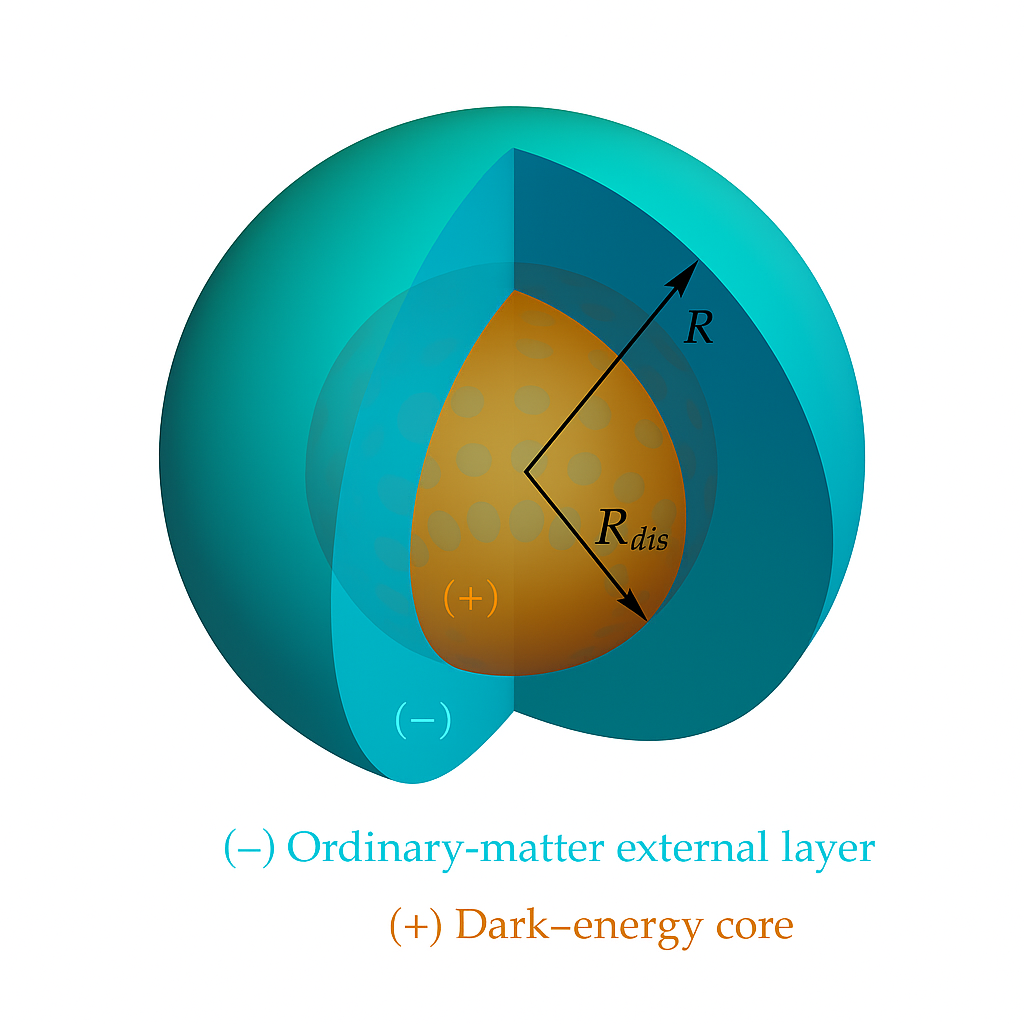

In [ ]:
from IPython.display import Image

# Mostrar una imagen con tamaño personalizado
Image("/content/drive/MyDrive/ChatGPT Image 26 jul 2025, 12_45_30.png", width=500, height=500)

In [ ]:
%%shell
pip install einsteinpy sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Function, Symbol, Matrix, simplify, sin, cos
from scipy.integrate import solve_ivp
from sympy.physics.quantum import TensorProduct
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RicciTensor, RicciScalar, EinsteinTensor
sp.init_printing()

## Metrica:
$ds^2 = - N(r)^2dt^2 + \frac{dr^2}{G(r)^2} + r^2d\theta^2$

## Tensor energia-momento:
$T_{\mu\nu} = -(p +\rho)U_\mu U_\nu + pg_{\mu \nu}$

In [ ]:
# Coordenadas circulares (t, r, theta) 2d + 1
t, r, theta = symbols('t r theta')
symbs = t, r, theta
N = Function('N')
G = Function('G')
# Parámetros físicos
M = sp.Symbol("M")  # Masa del objeto central

# Definir tensor métrico
m = sp.diag(-N(r)**2, 1/G(r)**2, r**2).tolist()
g = MetricTensor(m, symbs)
g.tensor()

⎡  2              ⎤
⎢-N (r)    0    0 ⎥
⎢                 ⎥
⎢          1      ⎥
⎢  0     ─────  0 ⎥
⎢         2       ⎥
⎢        G (r)    ⎥
⎢                 ⎥
⎢                2⎥
⎣  0       0    r ⎦

In [ ]:
# Tensor métrico inverso g^{μν}
g_inv = g.inv()
g_inv.tensor()

⎡ -1             ⎤
⎢─────    0    0 ⎥
⎢ 2              ⎥
⎢N (r)           ⎥
⎢                ⎥
⎢        2       ⎥
⎢  0    G (r)  0 ⎥
⎢                ⎥
⎢              1 ⎥
⎢  0      0    ──⎥
⎢               2⎥
⎣              r ⎦

In [ ]:
# Tensor Energia-Momento para un fluido perfecto
p = Function('p')(r) #Presion
rho = Function('rho')(r) #Densidad
t = sp.diag(-N(r)**2*rho, 1/G(r)**2*p, r**2*p).tolist()
T = MetricTensor(t,symbs)
T.tensor()

⎡  2                        ⎤
⎢-N (r)⋅ρ(r)    0       0   ⎥
⎢                           ⎥
⎢             p(r)          ⎥
⎢     0       ─────     0   ⎥
⎢              2            ⎥
⎢             G (r)         ⎥
⎢                           ⎥
⎢                     2     ⎥
⎣     0         0    r ⋅p(r)⎦

# Ecuaciones de Campo:
$G_{\mu\nu} = R_{\mu\nu} -\frac{1}{2}g_{\mu\nu}R = kT_{\mu\nu} - \Lambda g_{\mu\nu}$


In [ ]:
# Tensor de Ricci
Ricci = RicciTensor.from_metric(g)
#print("---- Tensor de Ricci R_{μν} ----\n")
#R.tensor()

In [ ]:
# Escalar de Ricci
R = RicciScalar.from_riccitensor(Ricci)
#print("---- Escalar de Ricci R ----\n")
#R_scalar.tensor()

In [ ]:
# Tensor de Einstein
G_mu = EinsteinTensor.from_metric(g)
#print("---- Tensor de Einstein G_{μν} ----\n")
#G_mu.tensor()

In [ ]:
# Constante de Einstein
kappa = Symbol('kappa')
pi = sp.pi

#Constante Cosmologica
l = Symbol('Lambda')

# 3. Construir ecuaciones de campo: G_{μν} = κ T_{μν} - λ g{μν}
field_eqs = G_mu.tensor() - kappa * T.tensor() + l * g.tensor()

# 4. (Opcional) Simplificar ecuaciones
simplified_eqs = simplify(field_eqs)

# Mostrar ecuaciones
simplified_eqs

⎡    ⎛                       d       ⎞  2                                      ↪
⎢1.0⋅⎜-Λ⋅r + κ⋅r⋅ρ(r) - G(r)⋅──(G(r))⎟⋅N (r)                                   ↪
⎢    ⎝                       dr      ⎠                                         ↪
⎢───────────────────────────────────────────                  0                ↪
⎢                     r                                                        ↪
⎢                                                                              ↪
⎢                                                                      d       ↪
⎢                                                                  1.0⋅──(N(r) ↪
⎢                                             1.0⋅Λ   1.0⋅κ⋅p(r)       dr      ↪
⎢                     0                       ───── - ────────── + ─────────── ↪
⎢                                              2         2            r⋅N(r)   ↪
⎢                                             G (r)     G (r)                  ↪
⎢                           

## Expresiones Analiticas:


$\kappa p = \frac{1}{N(r)}[N_1G(r) - \frac{N(r)}{l^2}]$

$G(r)^2 = 1 + \frac{r^2}{l^2} - m(r)$

$N(r) = \frac{1}{1 + \pi l^2 p(r)}G(r)$

In [ ]:
# Declaración de símbolos
r, l = symbols('r l')
p = Function('p')  # presión como función de r
G = Function('G')  # G(r) genérico

# Definir N(r)
N = G(r) / (1 + pi * l**2 * p(r))

In [ ]:
# Redefinimos la metrica
m = sp.diag(-N**2, 1/G(r)**2, r**2).tolist()
g = MetricTensor(m, symbs)

# Tensor métrico inverso g^{μν}
g_inv = g.inv()

# Invariantes de Curvatura
$R = g^{ab}R_{ab}\hspace{1cm}$
$R_1 = \frac{1}{4}S_a^bS_b^a\hspace{1cm}$
$R_2 = \frac{1}{8}S_a^bS_b^cS_c^a\hspace{1cm}$
$R_3 = \frac{1}{16}S_a^bS_b^cS_c^dS_d^a\hspace{1cm}$


In [ ]:
from sympy import Rational

def invariantes_S(metric):
  """
  Calcula los invariantes R1, R2, R3 construidos con el Ricci sin traza S^a_b.
  Asume que la métrica es de 3 dimensiones.
  """
  n = 3 # 3 Dimensiones

  # S_{ab} = R_{ab} - (1/4) g_{ab} R (usando la métrica covariante)
  S_cov = Ricci.tensor() - (R.expr / 4) * metric.tensor()

  # Construir S^a_b = g^{ac} S_{cb} como una matriz
  S_mixed = sp.zeros(n)
  for a in range(n):
      for b in range(n):
          S_mixed[a, b] = sum(g_inv[a, c] * S_cov[c, b] for c in range(n))

  # Calcular invariantes usando operaciones matriciales
  R1 = Rational(1/4) * (S_mixed**2).trace()
  R2 = Rational(1/8) * (S_mixed**3).trace()
  R3 = Rational(1/16) * (S_mixed**4).trace()

  return simplify(R1), simplify(R2), simplify(R3)

In [ ]:
# Re-calculamos
Ricci = RicciTensor.from_metric(g)

In [ ]:
R = RicciScalar.from_riccitensor(Ricci)
R.tensor()

  ⎛                    2                                    2                  ↪
  ⎜ 2  4    2         d              2  4    2    ⎛d       ⎞     2  4          ↪
2⋅⎜π ⋅l ⋅r⋅G (r)⋅p(r)⋅───(p(r)) - 2⋅π ⋅l ⋅r⋅G (r)⋅⎜──(p(r))⎟  - π ⋅l ⋅r⋅G(r)⋅p ↪
  ⎜                     2                         ⎝dr      ⎠                   ↪
  ⎝                   dr                                                       ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪

↪       2                                                                      ↪
↪ 2    d              2  4             d        d           2  4    2    ⎛d    ↪
↪  (r)⋅───(G(r)) + 3⋅π ⋅l ⋅r⋅G(r)⋅p(r)⋅──(G(r))⋅──(p(r)) - π ⋅l ⋅r⋅p (r)⋅⎜──(G ↪
↪        2                             dr       dr                       ⎝dr   ↪
↪      dr                  

In [ ]:
R1_val, R2_val, R3_val = invariantes_S(g)

In [ ]:
R1_val

                                                                               ↪
⎛  ⎛  ⎛               3                                                        ↪
⎜  ⎜  ⎜⎛   2         ⎞  ⎛   2      d          ⎛   2         ⎞ d       ⎞ d      ↪
⎜2⋅⎜r⋅⎜⎝π⋅l ⋅p(r) + 1⎠ ⋅⎜π⋅l ⋅G(r)⋅──(p(r)) - ⎝π⋅l ⋅p(r) + 1⎠⋅──(G(r))⎟⋅──(G(r ↪
⎜  ⎜  ⎜                 ⎝          dr                         dr      ⎠ dr     ↪
⎝  ⎝  ⎝                                                                        ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪

↪                                                                              ↪
↪                     2 ⎛                        2        ⎛      2             ↪
↪      ⎛   2         ⎞  ⎜  

In [ ]:
R2_val

                                                                               ↪
⎛  ⎛  ⎛               3                                                        ↪
⎜  ⎜  ⎜⎛   2         ⎞  ⎛   2      d          ⎛   2         ⎞ d       ⎞ d      ↪
⎜2⋅⎜r⋅⎜⎝π⋅l ⋅p(r) + 1⎠ ⋅⎜π⋅l ⋅G(r)⋅──(p(r)) - ⎝π⋅l ⋅p(r) + 1⎠⋅──(G(r))⎟⋅──(G(r ↪
⎜  ⎜  ⎜                 ⎝          dr                         dr      ⎠ dr     ↪
⎝  ⎝  ⎝                                                                        ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪

↪                                                                              ↪
↪                     2 ⎛                        2        ⎛      2             ↪
↪      ⎛   2         ⎞  ⎜  

In [ ]:
R3_val

                                                                               ↪
⎛  ⎛  ⎛               3                                                        ↪
⎜  ⎜  ⎜⎛   2         ⎞  ⎛   2      d          ⎛   2         ⎞ d       ⎞ d      ↪
⎜2⋅⎜r⋅⎜⎝π⋅l ⋅p(r) + 1⎠ ⋅⎜π⋅l ⋅G(r)⋅──(p(r)) - ⎝π⋅l ⋅p(r) + 1⎠⋅──(G(r))⎟⋅──(G(r ↪
⎜  ⎜  ⎜                 ⎝          dr                         dr      ⎠ dr     ↪
⎝  ⎝  ⎝                                                                        ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪

↪                                                                              ↪
↪                     2 ⎛                        2        ⎛      2             ↪
↪      ⎛   2         ⎞  ⎜  

# Equilibrio Hidrostatico:
$\frac{1}{r} \frac{dp}{dr} = -\frac{1}{G(r)} \left(\pi p + \frac{1}{l^2}\right)(p + \rho)$

## Ecuacion de Estado:
$
p(\rho) =
\begin{cases}
\frac{-B\kappa}{\rho^\alpha} - 2\kappa'\rho + \frac{\kappa'}{B}\rho^{(2+\alpha)} &   0 \leq r \leq R_{dist}  \\
\kappa \rho^{1+1/\eta} &  R_{dist} \leq r \leq R
\end{cases}
$


# Simulacion para el Equilibrio

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# ----- Parámetros físicos -----
pi  = np.pi

# Funcion G(r)
G_0 = 1e15
l   = 1.0

# Ecuacion de estado
k = 100.0 # kappa
alpha = 1.0
eta = 1.0

In [ ]:
# Hacemos el match para hacer continua la presion
def continuidad(rho_1,rho_2,kp):
  # - B^2*a - B*b + c = 0

  a = -k/rho_1**alpha
  b = -k*rho_2**(1+1/eta) - 2*kp * rho_1
  c = kp*rho_1**(alpha+2)

  # Calculamos las soluciones para B
  D = b*b - 4*a*c
  if D < 0:
    print("Valor de b^2: ", b)
    print("Valor de -4ac: ",-4*a*c)
    raise ValueError(f"Discriminante negativo: D={D:.2}")

  B1 = (-b + np.sqrt(b*b - 4*a*c)) / (2*a)
  B2 = (-b - np.sqrt(b*b - 4*a*c)) / (2*a)

  print("Soluciones: ", B1, B2)

  return [B1, B2]

$\frac{dp}{dr} = -\frac{r}{G(r)} \left(\pi p + \frac{1}{l^2}\right)(p + \rho)$

$\frac{dm}{dr} = 2\pi r\rho$

In [ ]:
#------------Funciones---------------
def G(r,m):
  return G_0**2 + r**2 / l - m

# Ecuaciones de estado
def EOS1(rho, kp):
  B = 1e15
  return -(B*k)/rho**alpha - 2.0*kp*rho + (kp/B)*rho**(alpha + 2.0)

def EOS2(rho,eta):
  return k*rho**(1+1/eta)

"""
Tolmann-Oppenheimer-Volkhoff equations
d/dt y(t) = R.H.S.
"""
def TOV(r, y, EOS,kp):

  rho, m = y
  # Llamamos la ecuacion de estado
  p = EOS(rho,kp)

  # Nuestro sistema de Ecuaciones
  dp_dr = - (r / G(r,m)) * (pi*p + 1.0/l**2) * (p + rho)
  dm_dr = 2.0 * pi * r * rho

  return [dp_dr, dm_dr]

'''
Definimos una funcion para encontrar las superficies
    y dejar de integrar
'''
def found_radio(r, y, eos, eos_param):
    rho, _ = y
    return eos(rho, eos_param)

In [ ]:
from functools import partial

# Integrar un tramo
def integrar_tramo(r_ini,r_fin,y0,eos_fun, kp):
  evento = partial(found_radio, eos=eos_fun, eos_param=kp)

  sol = solve_ivp(
    lambda r, y: TOV(r, y, eos_fun, kp), (r_ini, r_fin),
    y0, t_eval=np.linspace(r_ini, r_fin, N),
    events=evento,
    rtol=1e-7, atol=1e-9)

  # Usamos el evento para localizar la superficie:
  if sol.t_events[0].size > 0:
      r_surface = sol.t_events[0][0]
      print(f"Superficie (p=0) detectada en r ≈ {r_surface:.4f}")

  return sol

In [ ]:
def sistema(R_dist, R,rho_c,m0, kp):
  # Condiciones iniciales
  r0 = 1e-6 # Evita r=0 exacto
  y0 = [rho_c, m0]

  # Integramos ambos tramos
  sol1 = integrar_tramo(r0, R_dist, y0, EOS1, kp)

  #Evaluamos continuidad
  rho_e = sol1.y[0,-1]
  B1 ,B2 = continuidad(rho_c, rho_e, kp)

  sol2 = integrar_tramo(R_dist, R, sol1.y[:, -1], EOS2, eta)

  # Unimos las soluciones
  r_all = np.concatenate((sol1.t, sol2.t))
  y_all = np.concatenate((sol1.y, sol2.y), axis=1)
  p1 = EOS1(sol1.y[0],kp); p2 = EOS2(sol2.y[0],eta)

  # ----- Gráficas -----
  plt.figure()
  plt.plot(r_all, y_all[0], label="ρ(r)")
  plt.xlabel("r")
  plt.ylabel("Densidad ρ")
  plt.grid()
  plt.legend()

  plt.figure()
  plt.plot(sol1.t, p1, label="p(r)")
  plt.plot(sol2.t, p2, label="p(r)")
  plt.xlabel("r")
  plt.ylabel("Presión p")
  plt.grid()
  plt.legend()

  plt.figure()
  plt.plot(r_all, y_all[1], label="m(r)")
  plt.xlabel("r")
  plt.ylabel("Masa m")
  plt.grid()
  plt.legend()

  plt.show()

Soluciones:  -3.341104301342526e+33 1.4965111980032e+26


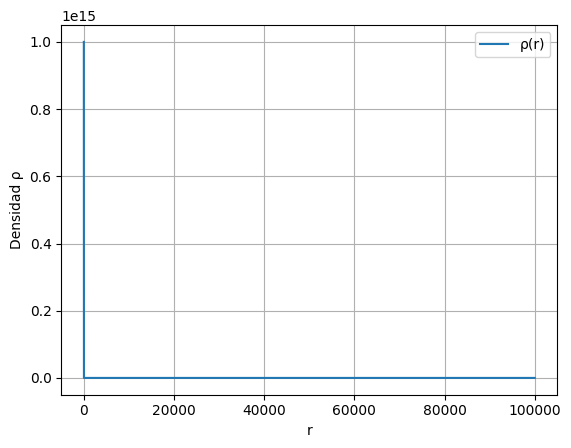

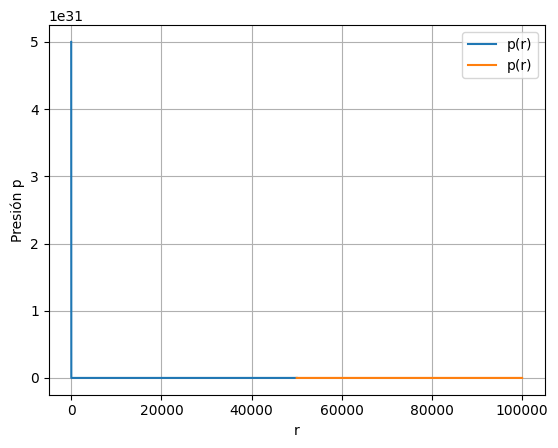

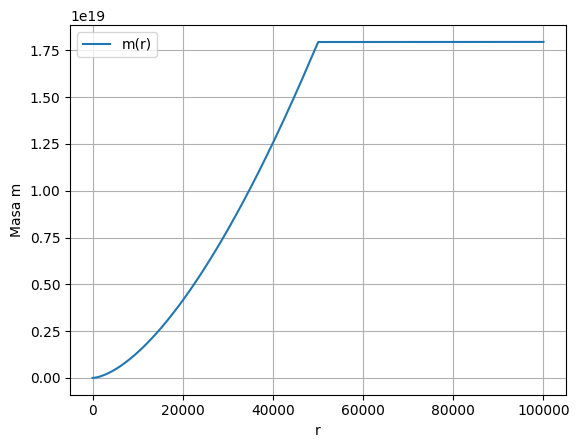

In [ ]:
# Limites de integración
N = 10000 # Numero de Puntos
R_dist = 0.5e5
R = 1e5
rho = 1e15
m0 = 0.0
sistema(R_dist,R,rho,m0,50)

Soluciones:  2.7545329840378785 3.675759215327213


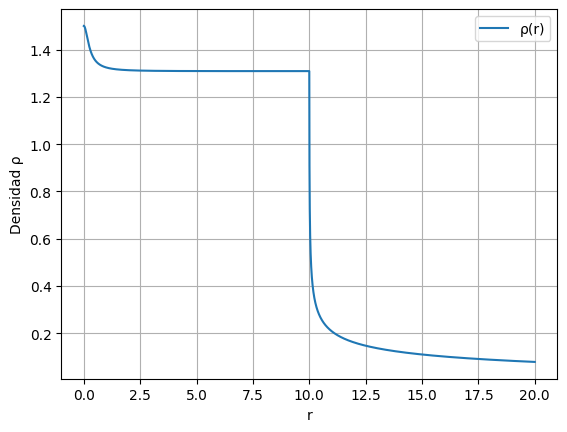

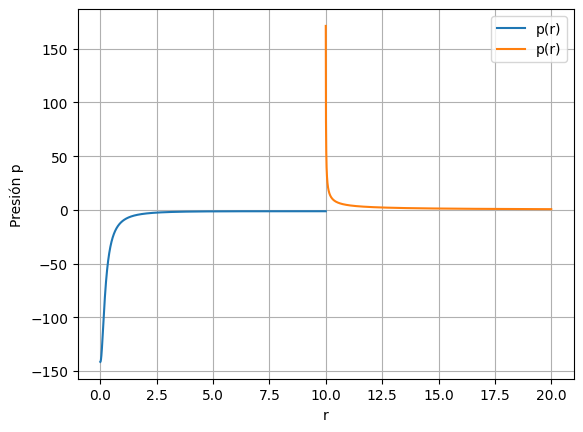

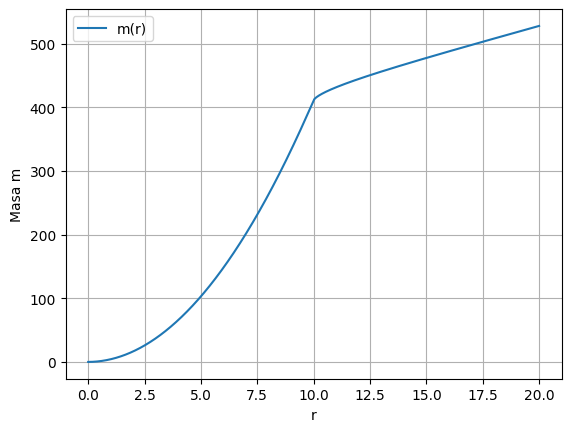

-200
Valor de b^2:  291.35278063114583
Valor de -4ac:  -135000.0


ValueError: Discriminante negativo: D=-5e+04

In [ ]:
# Limites de integración
N = 10000 # Numero de Puntos
R_dist = 10.0
R = 20.0
k_p = range(-200,200,50)
rho = 1.5
m0 = 0.0
for kp in k_p:
  sistema(R_dist,R,rho,m0,kp)

In [ ]:
print(r)

NameError: name 'r' is not defined

In [ ]:
# Logica

# Discretizamos en pasos para delta r
# Aplicamos Range-Kutta 4

# Definimos las condiciones de contono para la estrella
# Condiciones en r=0 y r=R

# Pasos para Integrar

  # Inicializamos las Cond. Iniciales P_c y \rho_c

  # Ciclo para integrar

    # Calcular dm/dr
    # Calcular dp/dr
    # Actualizamos m y P

    # Usamos la EOS para calcular \rho(r) en el rango r < R_dist

    # Comprobamos regularidad con los invariantes

    # Comprobamos si llegó a la Superficie (1) -> r = R_dist
      # Si sí termina
      # Si no continuamos

  # Repetimos pero con la EOS para r > R_dist

    # Comprobamos si llegó a la Superficie (2) -> r = R
      # Si sí termina
      # Si no continuamos

# Ajustamos P_c para generar distintas configuraciones

In [ ]:
# Codigo